In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/kaggle/input/used-car-price-prediction-dataset/used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [2]:
df.shape

(4009, 12)

In [3]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [4]:
(df.isnull().sum()/len(df))*100

brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        4.240459
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         2.818658
clean_title     14.866550
price            0.000000
dtype: float64

**Unique car Brands in the Dataset**

In [5]:
df['brand'].unique()

array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Tesla', 'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar',
       'Mercedes-Benz', 'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia',
       'Jeep', 'Bentley', 'Honda', 'Lucid', 'MINI', 'Porsche', 'Hummer',
       'Chrysler', 'Volvo', 'Cadillac', 'Lamborghini', 'Maserati',
       'Volkswagen', 'Subaru', 'Rivian', 'GMC', 'RAM', 'Alfa', 'Ferrari',
       'Scion', 'Mitsubishi', 'Mazda', 'Saturn', 'Bugatti', 'Polestar',
       'Rolls-Royce', 'McLaren', 'Buick', 'Lotus', 'Pontiac', 'FIAT',
       'Karma', 'Saab', 'Mercury', 'Plymouth', 'smart', 'Maybach',
       'Suzuki'], dtype=object)

**Number of cars in each brand in the dataset**

In [6]:
brand_count = df['brand'].value_counts()
brand_count

brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Mazda             64
Acura             64
Subaru            64
Honda             63
Volkswagen        59
INFINITI          59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Mitsubishi        20
Genesis           20
Alfa              19
Rivian            17
Hummer            16
Pontiac           15
Ferrari           12
Rolls-Royce       11
Aston              9
McLaren            6
Scion              6
FIAT               5
Saturn             5
Lotus              4
Lucid  

In [7]:
brand_count.sum()

4009

In [8]:
brand_count[brand_count > 25].sum()

3828

In [9]:
(brand_count.sum() - brand_count[brand_count > 25].sum())/len(df)

0.04514841606385633

**Filter and find car brands with sample size more then 25**

In [10]:
brand_count_more_25 = brand_count[brand_count > 25]
brand_count_more_25

brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Mazda             64
Acura             64
Subaru            64
Honda             63
Volkswagen        59
INFINITI          59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Name: count, dtype: int64

**Function to filter dataset with cars having sample more then 25**

In [11]:
def filter_car(x):
    return x in brand_count_more_25

In [12]:
filter_car('MINI')

True

In [13]:
filter_car('Suzuki')

False

In [14]:
df1 = df[df['brand'].apply(filter_car)]
df1.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [15]:
df1.shape

(3828, 12)

In [16]:
df1.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       146
engine            0
transmission      0
ext_col           0
int_col           0
accident        103
clean_title     573
price             0
dtype: int64

In [17]:
df1['model'].nunique()

1798

In [18]:
df1['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', nan, 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [19]:
df1['fuel_type'].value_counts()

fuel_type
Gasoline          3155
Hybrid             193
E85 Flex Fuel      139
Diesel             116
–                   43
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [20]:
df1[df1['fuel_type'] == 'not supported']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
2894,Toyota,Mirai Limited,2021,"44,000 mi.",not supported,182.0HP Electric Motor Hydrogen Fuel,A/T,Gray,Black,None reported,Yes,"$18,500"
3700,Toyota,Mirai Base,2016,"40,000 mi.",not supported,151.0HP Electric Motor Hydrogen Fuel,A/T,Silver,Black,None reported,Yes,"$9,500"


In [21]:
df1[df1['fuel_type'] == '–']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
130,Chrysler,Pacifica Touring,2017,"87,305 mi.",–,–,9-Speed A/T,Silver,Black,None reported,Yes,"$9,000"
257,Toyota,Land Cruiser Base,1993,"231,500 mi.",–,–,A/T,White,Gray,None reported,Yes,"$29,500"
338,Mazda,Mazda3 s Grand Touring,2016,"85,000 mi.",–,–,A/T,Black,Black,At least 1 accident or damage reported,Yes,"$18,500"
491,Chrysler,Pacifica Touring,2017,"63,000 mi.",–,–,9-Speed A/T,White,Beige,None reported,Yes,"$20,000"
692,Honda,Civic EX,1993,"58,981 mi.",–,–,A/T,White,Beige,None reported,Yes,"$9,599"
855,Ford,Bronco,1974,"6,217 mi.",–,–,–,Dark Gray Metallic,–,None reported,Yes,"$115,000"
923,Dodge,Challenger R/T,2010,"100,100 mi.",–,–,Transmission w/Dual Shift Mode,Purple,Black,None reported,Yes,"$17,000"
995,Dodge,Challenger R/T Scat Pack,2019,"43,000 mi.",–,–,6-Speed M/T,Green,Black,None reported,Yes,"$50,000"
1063,Mazda,Mazda6 i Grand Touring,2016,"83,100 mi.",–,–,A/T,White,White,None reported,Yes,"$17,800"
1083,Dodge,Challenger R/T,2010,"73,000 mi.",–,–,A/T,Black,Black,None reported,Yes,"$17,500"


In [22]:
#replace all '–' with null values

def replace_dash(x):
    if x == '–':
        return np.nan
    else:
        return x

In [23]:
df2 = df1.applymap(replace_dash)

In [24]:
df2.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       189
engine           43
transmission      3
ext_col          13
int_col         123
accident        103
clean_title     573
price             0
dtype: int64

In [25]:
#df2.dropna()

In [26]:
df2['fuel_type'].value_counts()

fuel_type
Gasoline          3155
Hybrid             193
E85 Flex Fuel      139
Diesel             116
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

**Remove car samples with Plug-In Hybrid & not supported fuel type as their sample size is very less**

In [27]:
df3 = df2[df2['fuel_type'].isin(['Gasoline','Hybrid','E85 Flex Fuel','Diesel'])]
df3.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [28]:
df3.groupby('brand')['fuel_type'].value_counts().unstack().fillna(0)

fuel_type,Diesel,E85 Flex Fuel,Gasoline,Hybrid
brand,,,,
Acura,0.0,0.0,60.0,2.0
Audi,4.0,8.0,145.0,37.0
BMW,0.0,0.0,336.0,19.0
Bentley,0.0,2.0,31.0,0.0
Buick,0.0,1.0,28.0,1.0
Cadillac,3.0,9.0,91.0,0.0
Chevrolet,11.0,33.0,239.0,1.0
Chrysler,0.0,6.0,18.0,1.0
Dodge,5.0,4.0,73.0,0.0


**Fill all the missing values in fuel type with "Gasoline" as all brands have most number of gasoline cars**

In [29]:
df3['fuel_type'] = df3['fuel_type'].fillna('Gasoline')

/tmp/ipykernel_20/2273006607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['fuel_type'] = df3['fuel_type'].fillna('Gasoline')


In [30]:
df3.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type         0
engine            0
transmission      2
ext_col          13
int_col         115
accident        100
clean_title     549
price             0
dtype: int64

In [31]:
df3[df3['transmission'].isnull()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
536,Porsche,911 Carrera S,2017,"16,701 mi.",Gasoline,3.0 Liter,NaN,Red,NaN,None reported,NaN,"$107,998"
916,Porsche,911 Carrera 4S,2018,"31,678 mi.",Gasoline,3.0 Liter,NaN,Silver,NaN,None reported,NaN,"$106,798"


In [32]:
df3['transmission'] = df3['transmission'].fillna('_')

/tmp/ipykernel_20/3124062541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['transmission'] = df3['transmission'].fillna('_')


In [33]:
df3['transmission'].unique()

array(['6-Speed A/T', '8-Speed Automatic', 'Automatic', '7-Speed A/T',
       'F', 'A/T', 'Transmission w/Dual Shift Mode', '9-Speed Automatic',
       '6-Speed M/T', '8-Speed A/T', '10-Speed A/T', '9-Speed A/T',
       '5-Speed A/T', 'Automatic CVT',
       '7-Speed Automatic with Auto-Shift', 'CVT-F', 'M/T',
       '6-Speed Automatic with Auto-Shift', '10-Speed Automatic',
       'CVT Transmission', '4-Speed A/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T',
       '8-Speed Automatic with Auto-Shift', '5-Speed Automatic',
       '8-SPEED AT', '1-Speed Automatic', 'Manual', '6-Speed Manual',
       'Variable', '2', '7-Speed Manual', '5-Speed M/T',
       'Automatic, 9-Spd 9G-Tronic', 'Automatic, 8-Spd',
       'Automatic, 8-Spd Sport w/Sport & Manual Modes', '_',
       'Auto, 6-Spd w/CmdShft', 'Transmission Overdrive Switch',
       '7-Speed Automatic', 'Automatic, 8-Spd PDK Dual-Clutch',
       'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Manual Modes',
  

In [34]:
df3['transmission'].nunique()

57

In [35]:
df3['transmission'].value_counts()

transmission
A/T                                                                 888
Transmission w/Dual Shift Mode                                      374
8-Speed A/T                                                         373
6-Speed A/T                                                         354
6-Speed M/T                                                         231
Automatic                                                           225
7-Speed A/T                                                         206
8-Speed Automatic                                                   161
10-Speed A/T                                                        119
5-Speed A/T                                                          80
6-Speed Automatic                                                    73
9-Speed A/T                                                          72
10-Speed Automatic                                                   56
4-Speed A/T                                        

In [36]:
def fix_transmission_category(x):
    if 'A/T' in x or 'Automatic' in x:
        return 'Automatic'
    elif 'M/T' in x or 'Manual' in x:
        return 'Manual'
    else:
        return x

In [37]:
fix_transmission_category('Automatic, 8-Spd PDK Dual-Clutch')

'Automatic'

In [38]:
df3.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type         0
engine            0
transmission      0
ext_col          13
int_col         115
accident        100
clean_title     549
price             0
dtype: int64

In [39]:
df3['transmission'] = df3['transmission'].astype(str).apply(fix_transmission_category)

/tmp/ipykernel_20/1869362121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['transmission'] = df3['transmission'].astype(str).apply(fix_transmission_category)


In [40]:
df3['transmission'].value_counts()

transmission
Automatic                         2814
Transmission w/Dual Shift Mode     374
Manual                             334
CVT Transmission                    56
Transmission Overdrive Switch        6
Variable                             4
2                                    3
F                                    2
_                                    2
8-SPEED AT                           1
Auto, 6-Spd w/CmdShft                1
CVT-F                                1
6-Speed                              1
7-Speed                              1
6 Speed At/Mt                        1
SCHEDULED FOR OR IN PRODUCTION       1
6 Speed Mt                           1
Name: count, dtype: int64

In [41]:
df3['transmission'] = df3['transmission'].apply(lambda x : x if x in ['Automatic','Transmission w/Dual Shift Mode',
                                                                      'Manual' , 'CVT Transmission','_'] else 'Others')

/tmp/ipykernel_20/783113363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['transmission'] = df3['transmission'].apply(lambda x : x if x in ['Automatic','Transmission w/Dual Shift Mode',


In [42]:
df3['transmission'].value_counts()

transmission
Automatic                         2814
Transmission w/Dual Shift Mode     374
Manual                             334
CVT Transmission                    56
Others                              23
_                                    2
Name: count, dtype: int64

In [43]:
df3[df3['transmission'] == '_']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
536,Porsche,911 Carrera S,2017,"16,701 mi.",Gasoline,3.0 Liter,_,Red,NaN,None reported,NaN,"$107,998"
916,Porsche,911 Carrera 4S,2018,"31,678 mi.",Gasoline,3.0 Liter,_,Silver,NaN,None reported,NaN,"$106,798"


In [44]:
df3.groupby('brand')['transmission'].value_counts().unstack().fillna(0)

transmission,Automatic,CVT Transmission,Manual,Others,Transmission w/Dual Shift Mode,_
brand,,,,,,
Acura,45.0,0.0,5.0,6.0,6.0,0.0
Audi,145.0,0.0,13.0,0.0,36.0,0.0
BMW,235.0,0.0,43.0,1.0,76.0,0.0
Bentley,32.0,0.0,0.0,0.0,1.0,0.0
Buick,29.0,0.0,0.0,0.0,1.0,0.0
Cadillac,97.0,0.0,2.0,0.0,4.0,0.0
Chevrolet,231.0,0.0,29.0,4.0,20.0,0.0
Chrysler,23.0,0.0,0.0,0.0,2.0,0.0
Dodge,68.0,0.0,8.0,0.0,6.0,0.0


In [45]:
df3['transmission'] = df3['transmission'].str.replace('_','Automatic')

/tmp/ipykernel_20/1917497400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['transmission'] = df3['transmission'].str.replace('_','Automatic')


In [46]:
df3['transmission'].value_counts()

transmission
Automatic                         2816
Transmission w/Dual Shift Mode     374
Manual                             334
CVT Transmission                    56
Others                              23
Name: count, dtype: int64

In [47]:
df3.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type         0
engine            0
transmission      0
ext_col          13
int_col         115
accident        100
clean_title     549
price             0
dtype: int64

In [48]:
df4 = df3.fillna('_')

In [49]:
(df4 == '_').sum()

brand             0
model             0
model_year        0
milage            0
fuel_type         0
engine            0
transmission      0
ext_col          13
int_col         115
accident        100
clean_title     549
price             0
dtype: int64

In [50]:
df4[df4['ext_col'] == '_']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
63,Toyota,C-HR LE,2021,"13,180 mi.",Gasoline,2.0 Liter,Others,_,_,None reported,_,"$23,998"
422,Jeep,Wagoneer Series II 4x4,2022,"29,800 mi.",Gasoline,"HEMI 5.7L V-8 variable valve control, regular ...",Automatic,_,_,None reported,_,"$58,900"
506,Mercedes-Benz,AMG GT 53 Base,2021,"17,994 mi.",Gasoline,3.0L I6 24V GDI DOHC Turbo,Automatic,_,_,None reported,Yes,"$87,500"
608,Porsche,Macan S,2020,"19,701 mi.",Gasoline,3.0 Liter,Automatic,_,_,None reported,_,"$55,998"
915,Bentley,Flying Spur V8,2022,"27,858 mi.",Gasoline,4.0L V8 32V GDI DOHC Twin Turbo,Automatic,_,_,None reported,Yes,"$197,750"
987,Mercedes-Benz,C-Class 4MATIC Sedan,2022,"9,612 mi.",Gasoline,"2L I-4 gasoline direct injection, DOHC, variab...",Automatic,_,_,None reported,_,"$43,900"
1004,Maserati,MC20 MC20,2022,"1,220 mi.",Gasoline,"Nettuno 3L V-6 port/direct injection, DOHC, va...",Automatic,_,_,None reported,_,"$238,900"
1151,BMW,M8 Competition,2022,"5,018 mi.",Gasoline,4.4 Liter Twin Turbo,Automatic,_,Sakhir Orange/Black,None reported,_,"$114,998"
1286,Lexus,LS 500 Base,2018,"67,296 mi.",Gasoline,"3.5L V-6 port/direct injection, DOHC, VVT-iE/V...",Automatic,_,_,None reported,_,"$40,900"
1306,Land,Rover Range Rover 5.0L V8 Supercharged,2019,"31,866 mi.",Gasoline,"5L V-8 gasoline direct injection, DOHC, variab...",Automatic,_,_,None reported,_,"$68,900"


In [51]:
df4['ext_col'].nunique()

295

In [52]:
df4['int_col'].nunique()

147

In [53]:
df4['ext_col'].value_counts().head(10)

ext_col
Black     836
White     727
Gray      444
Silver    335
Blue      303
Red       220
Green      54
Gold       41
Brown      39
Beige      35
Name: count, dtype: int64

In [54]:
df4['ext_col'] = df4['ext_col'].apply(lambda x : x if x in ['Black','White','Gray','Silver','Blue','Red','_'] else 'Others')

In [55]:
df4['ext_col'].value_counts()

ext_col
Black     836
White     727
Others    725
Gray      444
Silver    335
Blue      303
Red       220
_          13
Name: count, dtype: int64

In [56]:
df4['int_col'].value_counts().head(10)

int_col
Black        1819
Beige         493
Gray          435
Brown         145
_             115
Red           112
White          83
Jet Black      57
Ebony          44
Blue           22
Name: count, dtype: int64

In [57]:
df4['int_col'] = df4['int_col'].apply(lambda x : x if x in ['Black','Beige','Gray','Brown','Red','_'] else 'Others')

In [58]:
df4['int_col'].value_counts()

int_col
Black     1819
Beige      493
Others     484
Gray       435
Brown      145
_          115
Red        112
Name: count, dtype: int64

In [59]:
df4.groupby('brand')['int_col'].value_counts().unstack().fillna(0)

int_col,Beige,Black,Brown,Gray,Others,Red,_
brand,,,,,,,
Acura,8.0,26.0,0.0,5.0,19.0,1.0,3.0
Audi,11.0,120.0,18.0,20.0,15.0,5.0,5.0
BMW,47.0,182.0,28.0,12.0,62.0,20.0,4.0
Bentley,7.0,10.0,1.0,2.0,12.0,0.0,1.0
Buick,9.0,4.0,1.0,3.0,13.0,0.0,0.0
Cadillac,31.0,43.0,7.0,4.0,16.0,1.0,1.0
Chevrolet,25.0,138.0,8.0,44.0,52.0,12.0,5.0
Chrysler,3.0,13.0,0.0,3.0,3.0,1.0,2.0
Dodge,4.0,46.0,1.0,24.0,1.0,5.0,1.0


In [60]:
df4.groupby('brand')['ext_col'].value_counts().unstack().fillna(0)

ext_col,Black,Blue,Gray,Others,Red,Silver,White,_
brand,,,,,,,,
Acura,14.0,3.0,10.0,11.0,7.0,4.0,13.0,0.0
Audi,44.0,14.0,34.0,40.0,3.0,19.0,40.0,0.0
BMW,98.0,37.0,55.0,48.0,12.0,30.0,74.0,1.0
Bentley,8.0,2.0,2.0,10.0,1.0,1.0,8.0,1.0
Buick,3.0,1.0,0.0,17.0,2.0,1.0,6.0,0.0
Cadillac,35.0,4.0,4.0,20.0,11.0,7.0,22.0,0.0
Chevrolet,48.0,29.0,23.0,70.0,33.0,23.0,58.0,0.0
Chrysler,6.0,5.0,4.0,2.0,0.0,3.0,5.0,0.0
Dodge,19.0,5.0,12.0,15.0,10.0,9.0,12.0,0.0


In [61]:
df4.groupby('ext_col')['int_col'].value_counts().unstack().fillna(0)

int_col,Beige,Black,Brown,Gray,Others,Red,_
ext_col,,,,,,,
Black,89.0,535.0,38.0,71.0,48.0,30.0,25.0
Blue,56.0,123.0,20.0,60.0,34.0,7.0,3.0
Gray,36.0,254.0,17.0,74.0,34.0,18.0,11.0
Others,74.0,295.0,19.0,38.0,275.0,7.0,17.0
Red,47.0,106.0,6.0,30.0,13.0,7.0,11.0
Silver,20.0,206.0,5.0,67.0,15.0,11.0,11.0
White,171.0,299.0,40.0,95.0,62.0,32.0,28.0
_,0.0,1.0,0.0,0.0,3.0,0.0,9.0


In [62]:
df4['ext_col'] = df4['ext_col'].str.replace('_','Black')
df4['int_col'] = df4['int_col'].str.replace('_','Black')

In [63]:
#We replaced all null values with '_'
(df4 == '_').sum()

brand             0
model             0
model_year        0
milage            0
fuel_type         0
engine            0
transmission      0
ext_col           0
int_col           0
accident        100
clean_title     549
price             0
dtype: int64

In [64]:
df4['accident'].unique()

array(['At least 1 accident or damage reported', 'None reported', '_'],
      dtype=object)

In [65]:
df4['accident'].value_counts()

accident
None reported                             2579
At least 1 accident or damage reported     924
_                                          100
Name: count, dtype: int64

In [66]:
df4['accident'] = df4['accident'].str.replace('_','None reported')
df4['accident'] = df4['accident'].str.replace('At least 1 accident or damage reported','reported')

In [67]:
df4['accident'].value_counts()

accident
None reported    2679
reported          924
Name: count, dtype: int64

In [68]:
(df4 == '_').sum()

brand             0
model             0
model_year        0
milage            0
fuel_type         0
engine            0
transmission      0
ext_col           0
int_col           0
accident          0
clean_title     549
price             0
dtype: int64

In [69]:
df4['clean_title'].unique()

array(['Yes', '_'], dtype=object)

In [70]:
df4['clean_title'].value_counts()

clean_title
Yes    3054
_       549
Name: count, dtype: int64

In [71]:
#Only 'Yes' was given info in the clean title column so drop it
df5 = df4.drop('clean_title' , axis = 'columns')
df5.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Automatic,Black,Black,reported,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,Automatic,Others,Gray,reported,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,Automatic,Black,Black,None reported,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,Automatic,Others,Black,None reported,"$34,999"


In [72]:
df5.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Automatic,Black,Black,reported,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,Automatic,Others,Gray,reported,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,Automatic,Black,Black,None reported,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,Automatic,Others,Black,None reported,"$34,999"


In [73]:
df5.nunique()

brand             32
model           1686
model_year        29
milage          2565
fuel_type          4
engine          1014
transmission       5
ext_col            7
int_col            6
accident           2
price           1467
dtype: int64

In [74]:
age = 2023 - df5['model_year']
df5.insert(2,'Age',age)

In [75]:
df5.head()

,brand,model,Age,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,Ford,Utility Police Interceptor Base,10,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Automatic,Black,Black,reported,"$10,300"
1,Hyundai,Palisade SEL,2,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,Automatic,Others,Gray,reported,"$38,005"
2,Lexus,RX 350 RX 350,1,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,"$54,598"
3,INFINITI,Q50 Hybrid Sport,8,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,Automatic,Black,Black,None reported,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,Automatic,Others,Black,None reported,"$34,999"


In [76]:
df6 = df5.drop('model_year' , axis = 'columns')
df6.head()

,brand,model,Age,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,Ford,Utility Police Interceptor Base,10,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Automatic,Black,Black,reported,"$10,300"
1,Hyundai,Palisade SEL,2,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,Automatic,Others,Gray,reported,"$38,005"
2,Lexus,RX 350 RX 350,1,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,"$54,598"
3,INFINITI,Q50 Hybrid Sport,8,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,Automatic,Black,Black,None reported,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,Automatic,Others,Black,None reported,"$34,999"


In [77]:
df6['milage'] = df6['milage'].str.replace(',','')

In [78]:
df6.head()

,brand,model,Age,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,Ford,Utility Police Interceptor Base,10,51000 mi.,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Automatic,Black,Black,reported,"$10,300"
1,Hyundai,Palisade SEL,2,34742 mi.,Gasoline,3.8L V6 24V GDI DOHC,Automatic,Others,Gray,reported,"$38,005"
2,Lexus,RX 350 RX 350,1,22372 mi.,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,"$54,598"
3,INFINITI,Q50 Hybrid Sport,8,88900 mi.,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,Automatic,Black,Black,None reported,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2,9835 mi.,Gasoline,2.0L I4 16V GDI DOHC Turbo,Automatic,Others,Black,None reported,"$34,999"


In [79]:
k = '9835 mi.'
int(k.split(' ')[0])

9835

In [80]:
df6['milage'] = df6['milage'].apply(lambda x : int(x.split(' ')[0]))

In [81]:
df6.head()

,brand,model,Age,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,Ford,Utility Police Interceptor Base,10,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Automatic,Black,Black,reported,"$10,300"
1,Hyundai,Palisade SEL,2,34742,Gasoline,3.8L V6 24V GDI DOHC,Automatic,Others,Gray,reported,"$38,005"
2,Lexus,RX 350 RX 350,1,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,"$54,598"
3,INFINITI,Q50 Hybrid Sport,8,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,Automatic,Black,Black,None reported,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,Automatic,Others,Black,None reported,"$34,999"


In [82]:
df6.dtypes

brand           object
model           object
Age              int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
price           object
dtype: object

In [83]:
df6['price'] = df6['price'].str.replace('$','').str.replace(',','').astype(float)

In [84]:
df6.head()

,brand,model,Age,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,Ford,Utility Police Interceptor Base,10,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Automatic,Black,Black,reported,10300.0
1,Hyundai,Palisade SEL,2,34742,Gasoline,3.8L V6 24V GDI DOHC,Automatic,Others,Gray,reported,38005.0
2,Lexus,RX 350 RX 350,1,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,54598.0
3,INFINITI,Q50 Hybrid Sport,8,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,Automatic,Black,Black,None reported,15500.0
4,Audi,Q3 45 S line Premium Plus,2,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,Automatic,Others,Black,None reported,34999.0


In [85]:
df6.dtypes

brand            object
model            object
Age               int64
milage            int64
fuel_type        object
engine           object
transmission     object
ext_col          object
int_col          object
accident         object
price           float64
dtype: object

In [86]:
df6.nunique()

brand             32
model           1686
Age               29
milage          2565
fuel_type          4
engine          1014
transmission       5
ext_col            7
int_col            6
accident           2
price           1467
dtype: int64

In [87]:
df6['model'].value_counts()

model
M3 Base                        30
F-150 XLT                      24
Corvette Base                  22
1500 Laramie                   18
Camaro 2SS                     17
                               ..
RS 4 4.2 quattro L              1
A4 3.2 Premium Plus quattro     1
Bronco Base                     1
Gallardo LP560-4                1
Impala 2LZ                      1
Name: count, Length: 1686, dtype: int64

In [88]:
df6['engine'].value_counts().head(10)

engine
2.0L I4 16V GDI DOHC Turbo                               51
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             48
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             47
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    44
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             42
285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel            40
5.7L V8 16V MPFI OHV                                     29
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel            28
3.6L V6 24V GDI DOHC                                     28
3.6L V6 24V MPFI DOHC                                    28
Name: count, dtype: int64

In [89]:
hp = df6['engine'].apply(lambda x : x.split('HP')[0]).apply(pd.to_numeric, errors='coerce')

In [90]:
litres = df6['engine'].apply(lambda x : x.split('L')[0].split(' ')[-1]).apply(pd.to_numeric, errors='coerce')

In [91]:
df6.insert(6,"HP",hp)
df6.insert(7,"Liters",litres)

In [92]:
df6.head()

,brand,model,Age,milage,fuel_type,engine,HP,Liters,transmission,ext_col,int_col,accident,price
0,Ford,Utility Police Interceptor Base,10,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,300.0,3.7,Automatic,Black,Black,reported,10300.0
1,Hyundai,Palisade SEL,2,34742,Gasoline,3.8L V6 24V GDI DOHC,NaN,3.8,Automatic,Others,Gray,reported,38005.0
2,Lexus,RX 350 RX 350,1,22372,Gasoline,3.5 Liter DOHC,NaN,NaN,Automatic,Blue,Black,None reported,54598.0
3,INFINITI,Q50 Hybrid Sport,8,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,354.0,3.5,Automatic,Black,Black,None reported,15500.0
4,Audi,Q3 45 S line Premium Plus,2,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,NaN,2.0,Automatic,Others,Black,None reported,34999.0


In [93]:
df7 = df6.drop(['model','engine'], axis = 'columns')
df7.head()

,brand,Age,milage,fuel_type,HP,Liters,transmission,ext_col,int_col,accident,price
0,Ford,10,51000,E85 Flex Fuel,300.0,3.7,Automatic,Black,Black,reported,10300.0
1,Hyundai,2,34742,Gasoline,NaN,3.8,Automatic,Others,Gray,reported,38005.0
2,Lexus,1,22372,Gasoline,NaN,NaN,Automatic,Blue,Black,None reported,54598.0
3,INFINITI,8,88900,Hybrid,354.0,3.5,Automatic,Black,Black,None reported,15500.0
4,Audi,2,9835,Gasoline,NaN,2.0,Automatic,Others,Black,None reported,34999.0


In [94]:
df7.isnull().sum()

brand             0
Age               0
milage            0
fuel_type         0
HP              705
Liters          168
transmission      0
ext_col           0
int_col           0
accident          0
price             0
dtype: int64

In [95]:
hp_mean = round(df7.groupby('brand')['HP'].mean(),2)
hp_mean

brand
Acura            256.60
Audi             318.67
BMW              364.79
Bentley          550.18
Buick            247.24
Cadillac         353.22
Chevrolet        365.81
Chrysler         273.23
Dodge            376.29
Ford             334.77
GMC              341.01
Honda            209.35
Hyundai          248.95
INFINITI         334.04
Jaguar           375.23
Jeep             251.15
Kia              228.45
Lamborghini      595.77
Land             381.04
Lexus            303.66
Lincoln          324.30
MINI             168.45
Maserati         411.89
Mazda            188.18
Mercedes-Benz    357.28
Nissan           301.46
Porsche          375.32
RAM              377.13
Subaru           218.74
Toyota           266.58
Volkswagen       208.61
Volvo            268.07
Name: HP, dtype: float64

In [96]:
hp_mean['Mazda']

188.18

In [97]:
#filter the car into two parts- with missing HP & non-missing HP
df7_hp0 = df7[df7['HP'].isnull()]
df7_hp1 = df7[~df7['HP'].isnull()]

In [98]:
df7_hp0['HP'] = df7_hp0['brand'].apply(lambda x: hp_mean[x])

/tmp/ipykernel_20/3841001669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7_hp0['HP'] = df7_hp0['brand'].apply(lambda x: hp_mean[x])


In [99]:
df8 = pd.concat((df7_hp0,df7_hp1),axis='rows',ignore_index = True)
df8.head()

,brand,Age,milage,fuel_type,HP,Liters,transmission,ext_col,int_col,accident,price
0,Hyundai,2,34742,Gasoline,248.95,3.8,Automatic,Others,Gray,reported,38005.0
1,Lexus,1,22372,Gasoline,303.66,NaN,Automatic,Blue,Black,None reported,54598.0
2,Audi,2,9835,Gasoline,318.67,2.0,Automatic,Others,Black,None reported,34999.0
3,Acura,7,136397,Gasoline,256.60,NaN,Others,Silver,Others,None reported,14798.0
4,Land,2,27608,Gasoline,381.04,NaN,Automatic,Others,Others,None reported,73897.0


In [100]:
df8.isnull().sum()

brand             0
Age               0
milage            0
fuel_type         0
HP                0
Liters          168
transmission      0
ext_col           0
int_col           0
accident          0
price             0
dtype: int64

In [101]:
liters_mean = round(df8.groupby('brand')['Liters'].mean(),1)
liters_mean

brand
Acura            3.0
Audi             2.9
BMW              3.3
Bentley          5.4
Buick            3.0
Cadillac         4.6
Chevrolet        5.2
Chrysler         3.7
Dodge            5.1
Ford             4.0
GMC              4.9
Honda            2.4
Hyundai          2.8
INFINITI         4.0
Jaguar           3.8
Jeep             3.6
Kia              2.7
Lamborghini      5.3
Land             3.6
Lexus            3.9
Lincoln          3.3
MINI             1.7
Maserati         3.5
Mazda            2.3
Mercedes-Benz    3.6
Nissan           3.6
Porsche          3.5
RAM              5.6
Subaru           2.3
Toyota           3.6
Volkswagen       2.3
Volvo            2.5
Name: Liters, dtype: float64

In [102]:
liters_mean['Volvo']

2.5

In [103]:
#Seperate data into two parts => with missing values of liters & non missing values of liters
df8_lit0 = df8[df8['Liters'].isnull()]
df8_lit1 = df8[~df8['Liters'].isnull()]

In [104]:
def fix_missing_liters(brand):
    return liters_mean[brand]

In [105]:
fix_missing_liters('Porsche')

3.5

In [106]:
df8_lit0.head()

,brand,Age,milage,fuel_type,HP,Liters,transmission,ext_col,int_col,accident,price
1,Lexus,1,22372,Gasoline,303.66,NaN,Automatic,Blue,Black,None reported,54598.0
3,Acura,7,136397,Gasoline,256.60,NaN,Others,Silver,Others,None reported,14798.0
4,Land,2,27608,Gasoline,381.04,NaN,Automatic,Others,Others,None reported,73897.0
5,Jaguar,3,15903,Gasoline,375.23,NaN,Automatic,Silver,Black,None reported,47998.0
7,BMW,3,25990,Gasoline,364.79,NaN,Automatic,White,Beige,None reported,38598.0


In [107]:
df8_lit0['Liters'] = df8_lit0['brand'].apply(fix_missing_liters)

/tmp/ipykernel_20/3618069351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8_lit0['Liters'] = df8_lit0['brand'].apply(fix_missing_liters)


In [108]:
#df8_lit0['Liters'] = df8_lit0['brand'].apply(lambda x : liters_mean[x])

In [109]:
df9 = pd.concat((df8_lit1,df8_lit0) , axis = 'rows' , ignore_index = True)
df9.head()

,brand,Age,milage,fuel_type,HP,Liters,transmission,ext_col,int_col,accident,price
0,Hyundai,2,34742,Gasoline,248.95,3.8,Automatic,Others,Gray,reported,38005.0
1,Audi,2,9835,Gasoline,318.67,2.0,Automatic,Others,Black,None reported,34999.0
2,Mercedes-Benz,2,1685,Gasoline,357.28,2.0,Automatic,Gray,Others,None reported,250000.0
3,Ford,0,2823,Gasoline,334.77,3.5,Automatic,Others,Black,None reported,58504.0
4,Audi,6,81880,E85 Flex Fuel,318.67,2.0,Automatic,Others,Black,None reported,21375.0


**Label Encoding**

In [110]:
df10 = df9.copy()

In [111]:
df10.head()

,brand,Age,milage,fuel_type,HP,Liters,transmission,ext_col,int_col,accident,price
0,Hyundai,2,34742,Gasoline,248.95,3.8,Automatic,Others,Gray,reported,38005.0
1,Audi,2,9835,Gasoline,318.67,2.0,Automatic,Others,Black,None reported,34999.0
2,Mercedes-Benz,2,1685,Gasoline,357.28,2.0,Automatic,Gray,Others,None reported,250000.0
3,Ford,0,2823,Gasoline,334.77,3.5,Automatic,Others,Black,None reported,58504.0
4,Audi,6,81880,E85 Flex Fuel,318.67,2.0,Automatic,Others,Black,None reported,21375.0


In [112]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df10['brand'] = le.fit_transform(df10['brand'])
df10['fuel_type'] = le.fit_transform(df10['fuel_type'])
df10['transmission'] = le.fit_transform(df10['transmission'])
df10['ext_col'] = le.fit_transform(df10['ext_col'])
df10['int_col'] = le.fit_transform(df10['int_col'])
df10['accident'] = le.fit_transform(df10['accident'])

In [113]:
df10.head()

,brand,Age,milage,fuel_type,HP,Liters,transmission,ext_col,int_col,accident,price
0,12,2,34742,2,248.95,3.8,0,3,3,1,38005.0
1,1,2,9835,2,318.67,2.0,0,3,1,0,34999.0
2,24,2,1685,2,357.28,2.0,0,2,4,0,250000.0
3,9,0,2823,2,334.77,3.5,0,3,1,0,58504.0
4,1,6,81880,1,318.67,2.0,0,3,1,0,21375.0


<Axes: >

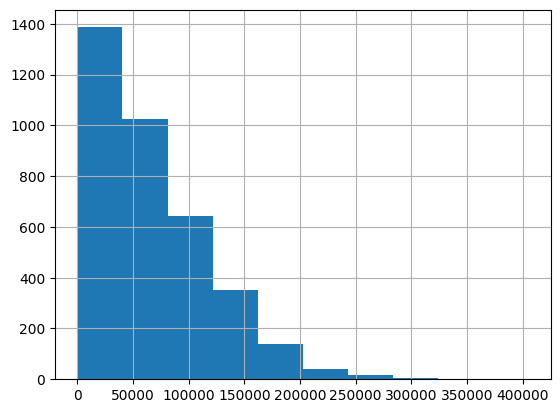

In [114]:
df10['milage'].hist()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


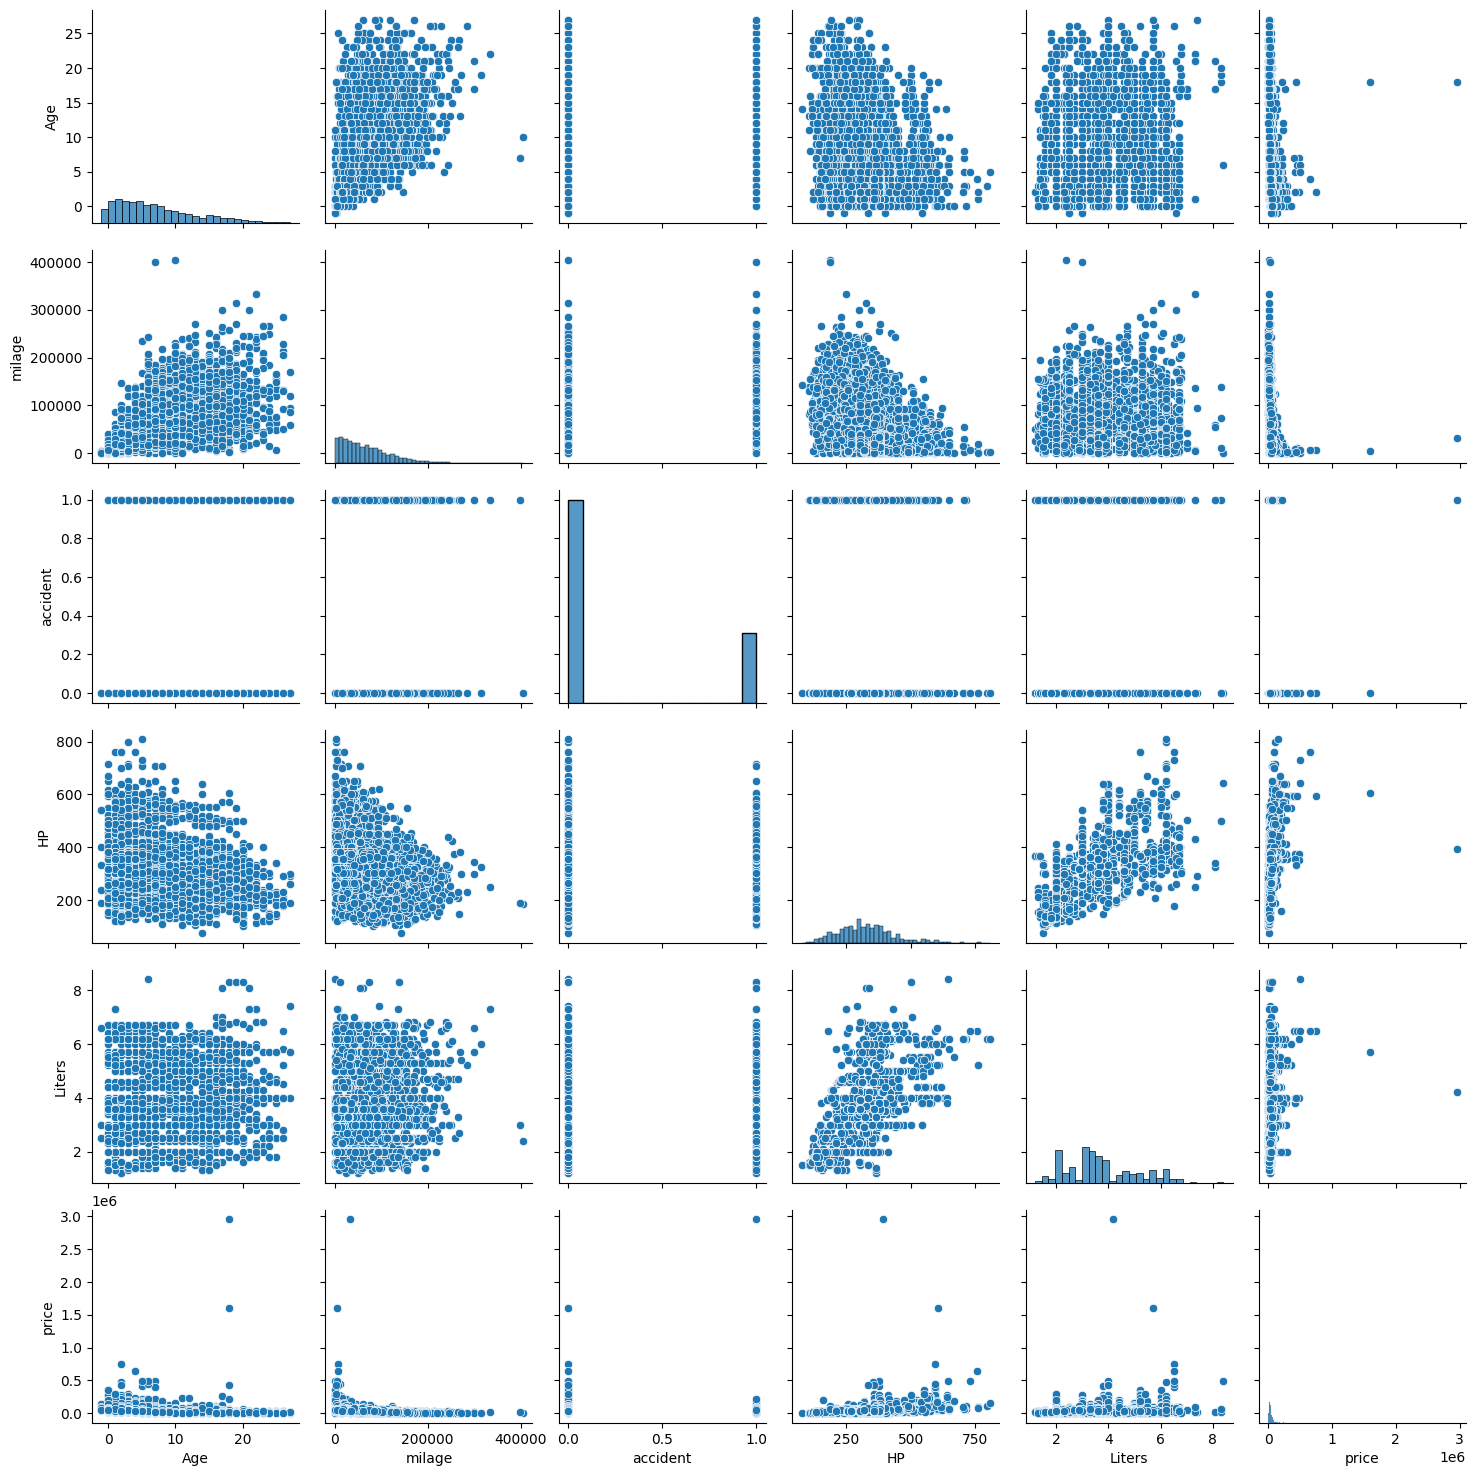

In [115]:
import seaborn as sns
sns.pairplot(df10[['Age','milage','accident','HP','Liters','price']])

In [116]:
df10.corr()

,brand,Age,milage,fuel_type,HP,Liters,transmission,ext_col,int_col,accident,price
brand,1.000000,0.006626,-0.007520,0.045702,-0.140412,-0.099380,-0.005337,0.002184,-0.069222,-0.007271,0.039619
Age,0.006626,1.000000,0.621295,-0.102421,-0.232649,0.101191,0.103691,0.030430,-0.131957,0.191265,-0.214971
milage,-0.007520,0.621295,1.000000,-0.182679,-0.297088,0.058708,-0.034915,0.009383,-0.128751,0.284131,-0.311093
fuel_type,0.045702,-0.102421,-0.182679,1.000000,-0.029038,-0.292307,0.049207,-0.039803,0.001139,-0.057588,0.025338
HP,-0.140412,-0.232649,-0.297088,-0.029038,1.000000,0.615116,0.097706,-0.054139,0.062011,-0.106731,0.352312
Liters,-0.099380,0.101191,0.058708,-0.292307,0.615116,1.000000,-0.046402,0.000761,0.021784,-0.001350,0.149689
transmission,-0.005337,0.103691,-0.034915,0.049207,0.097706,-0.046402,1.000000,-0.034048,-0.044249,0.004376,0.049228
ext_col,0.002184,0.030430,0.009383,-0.039803,-0.054139,0.000761,-0.034048,1.000000,0.013867,0.008086,-0.017294
int_col,-0.069222,-0.131957,-0.128751,0.001139,0.062011,0.021784,-0.044249,0.013867,1.000000,-0.029918,0.068641
accident,-0.007271,0.191265,0.284131,-0.057588,-0.106731,-0.001350,0.004376,0.008086,-0.029918,1.000000,-0.108686


In [117]:
X = df10.drop('price',axis='columns')
Y = df10['price']

<Axes: >

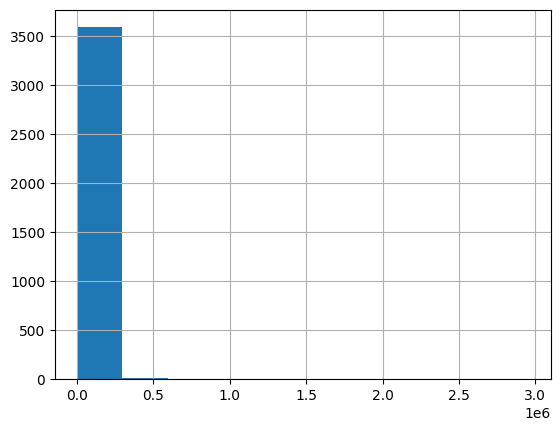

In [118]:
Y.hist()

<Axes: >

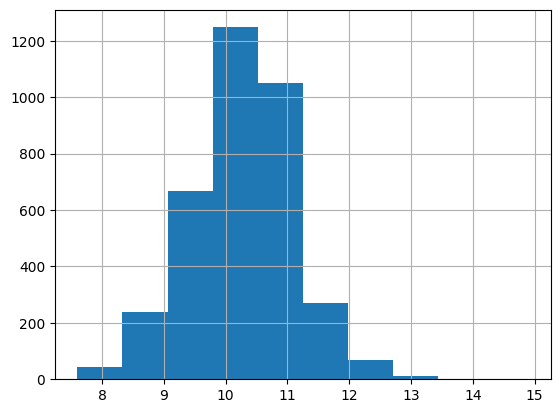

In [119]:
np.log(Y).hist()

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

xtrain,xtest,ytrain,ytest = train_test_split(X,Y)
model0 = LinearRegression()

model0.fit(xtrain,ytrain)

from sklearn.metrics import mean_absolute_error,r2_score

ytrainP = model0.predict(xtrain)
ytestP = model0.predict(xtest)

maeTrain = mean_absolute_error(ytrain,ytrainP)
maeTest = mean_absolute_error(ytest,ytestP)

r2Train = r2_score(ytrain,ytrainP)
r2Test = r2_score(ytest,ytestP)

print({"MAE_Train" : maeTrain , "MAE_Test" : maeTest})
print({"R2_Train" : r2Train , "R2_Test" : r2Test})

{'MAE_Train': 19610.34860504826, 'MAE_Test': 21417.944981801244}
{'R2_Train': 0.30148899434434895, 'R2_Test': 0.07063425021649572}


In [121]:
#Log transformation of target Y => to get a Normal distributed target value
Yt = np.log(Y)

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

xtrain,xtest,ytrain,ytest = train_test_split(X,Yt)
model1 = LinearRegression()

model1.fit(xtrain,ytrain)

LinearRegression()

In [123]:
from sklearn.metrics import mean_absolute_error,r2_score

ytrainP = model1.predict(xtrain)
ytestP = model1.predict(xtest)

maeTrain = mean_absolute_error(ytrain,ytrainP)
maeTest = mean_absolute_error(ytest,ytestP)

r2Train = r2_score(ytrain,ytrainP)
r2Test = r2_score(ytest,ytestP)

print({"MAE_Train" : maeTrain , "MAE_Test" : maeTest})
print({"R2_Train" : r2Train , "R2_Test" : r2Test})

{'MAE_Train': 0.2930291685935796, 'MAE_Test': 0.2982267393941168}
{'R2_Train': 0.762360919364471, 'R2_Test': 0.7444438707514167}


**One Hot Encoding**

In [124]:
df11 = df9.copy()

In [125]:
df11.head()

,brand,Age,milage,fuel_type,HP,Liters,transmission,ext_col,int_col,accident,price
0,Hyundai,2,34742,Gasoline,248.95,3.8,Automatic,Others,Gray,reported,38005.0
1,Audi,2,9835,Gasoline,318.67,2.0,Automatic,Others,Black,None reported,34999.0
2,Mercedes-Benz,2,1685,Gasoline,357.28,2.0,Automatic,Gray,Others,None reported,250000.0
3,Ford,0,2823,Gasoline,334.77,3.5,Automatic,Others,Black,None reported,58504.0
4,Audi,6,81880,E85 Flex Fuel,318.67,2.0,Automatic,Others,Black,None reported,21375.0


In [126]:
#Using feature Intersaction
#hpl = df11['HP'] * df11['Liters']
#df11.insert(6,"HPL",hpl)

#aml = df11['Age'] * df11['milage']
#df11.insert(3,"AML",aml)

In [127]:
df11.head()

,brand,Age,milage,fuel_type,HP,Liters,transmission,ext_col,int_col,accident,price
0,Hyundai,2,34742,Gasoline,248.95,3.8,Automatic,Others,Gray,reported,38005.0
1,Audi,2,9835,Gasoline,318.67,2.0,Automatic,Others,Black,None reported,34999.0
2,Mercedes-Benz,2,1685,Gasoline,357.28,2.0,Automatic,Gray,Others,None reported,250000.0
3,Ford,0,2823,Gasoline,334.77,3.5,Automatic,Others,Black,None reported,58504.0
4,Audi,6,81880,E85 Flex Fuel,318.67,2.0,Automatic,Others,Black,None reported,21375.0


In [128]:
df11.columns

Index(['brand', 'Age', 'milage', 'fuel_type', 'HP', 'Liters', 'transmission',
       'ext_col', 'int_col', 'accident', 'price'],
      dtype='object')

In [129]:
df11[['Age','milage','HP', 'Liters','price']].corr()

,Age,milage,HP,Liters,price
Age,1.000000,0.621295,-0.232649,0.101191,-0.214971
milage,0.621295,1.000000,-0.297088,0.058708,-0.311093
HP,-0.232649,-0.297088,1.000000,0.615116,0.352312
Liters,0.101191,0.058708,0.615116,1.000000,0.149689
price,-0.214971,-0.311093,0.352312,0.149689,1.000000


In [130]:
'''
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()

scl.fit(df11[['Age','milage','AML','HP', 'Liters', 'HPL']])

df11[['Age','milage','AML','HP', 'Liters', 'HPL']] = pd.DataFrame(scl.transform(df11[['Age','milage','AML',
                                                                                          'HP', 'Liters', 'HPL']]),
                                                                  columns = ['Age','milage','AML','HP', 'Liters', 'HPL'])
df11.head()
'''

"\nfrom sklearn.preprocessing import MinMaxScaler\nscl = MinMaxScaler()\n\nscl.fit(df11[['Age','milage','AML','HP', 'Liters', 'HPL']])\n\ndf11[['Age','milage','AML','HP', 'Liters', 'HPL']] = pd.DataFrame(scl.transform(df11[['Age','milage','AML',\n                                                                                          'HP', 'Liters', 'HPL']]),\n                                                                  columns = ['Age','milage','AML','HP', 'Liters', 'HPL'])\ndf11.head()\n"

In [131]:
df11[['Age','milage','HP', 'Liters','price']].corr()

,Age,milage,HP,Liters,price
Age,1.000000,0.621295,-0.232649,0.101191,-0.214971
milage,0.621295,1.000000,-0.297088,0.058708,-0.311093
HP,-0.232649,-0.297088,1.000000,0.615116,0.352312
Liters,0.101191,0.058708,0.615116,1.000000,0.149689
price,-0.214971,-0.311093,0.352312,0.149689,1.000000


In [132]:
df12 = pd.get_dummies(df11).applymap(lambda x : float(x))
df12.head()

,Age,milage,HP,Liters,price,brand_Acura,brand_Audi,brand_BMW,brand_Bentley,brand_Buick,...,ext_col_Silver,ext_col_White,int_col_Beige,int_col_Black,int_col_Brown,int_col_Gray,int_col_Others,int_col_Red,accident_None reported,accident_reported
0,2.0,34742.0,248.95,3.8,38005.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.0,9835.0,318.67,2.0,34999.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,1685.0,357.28,2.0,250000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,2823.0,334.77,3.5,58504.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6.0,81880.0,318.67,2.0,21375.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [133]:
X = df12.drop('price' , axis = 'columns')
Y = df12['price']

In [134]:
Yt = np.log(Y)

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

xtrain,xtest,ytrain,ytest = train_test_split(X,Yt)
model2 = LinearRegression()

model2.fit(xtrain,ytrain)

LinearRegression()

In [136]:
from sklearn.metrics import mean_absolute_error,r2_score

ytrainP = model2.predict(xtrain)
ytestP = model2.predict(xtest)

maeTrain = mean_absolute_error(ytrain,ytrainP)
maeTest = mean_absolute_error(ytest,ytestP)

r2Train = r2_score(ytrain,ytrainP)
r2Test = r2_score(ytest,ytestP)

print({"MAE_Train" : maeTrain , "MAE_Test" : maeTest})
print({"R2_Train" : r2Train , "R2_Test" : r2Test})

{'MAE_Train': 0.24532873970065297, 'MAE_Test': 0.24586344149534578}
{'R2_Train': 0.8220821503686895, 'R2_Test': 0.8351126035962703}


In [137]:
feature_coef = pd.DataFrame(model2.coef_.reshape(1,-1) , columns = xtrain.columns)
feature_coef

,Age,milage,HP,Liters,brand_Acura,brand_Audi,brand_BMW,brand_Bentley,brand_Buick,brand_Cadillac,...,ext_col_Silver,ext_col_White,int_col_Beige,int_col_Black,int_col_Brown,int_col_Gray,int_col_Others,int_col_Red,accident_None reported,accident_reported
0,-0.0541,-0.000005,0.002028,0.098752,-0.033149,0.078127,0.022852,0.524282,-0.223823,-0.114743,...,-0.057637,0.023079,-0.058265,-0.008792,-0.010464,-0.043665,0.063869,0.057317,0.026737,-0.026737


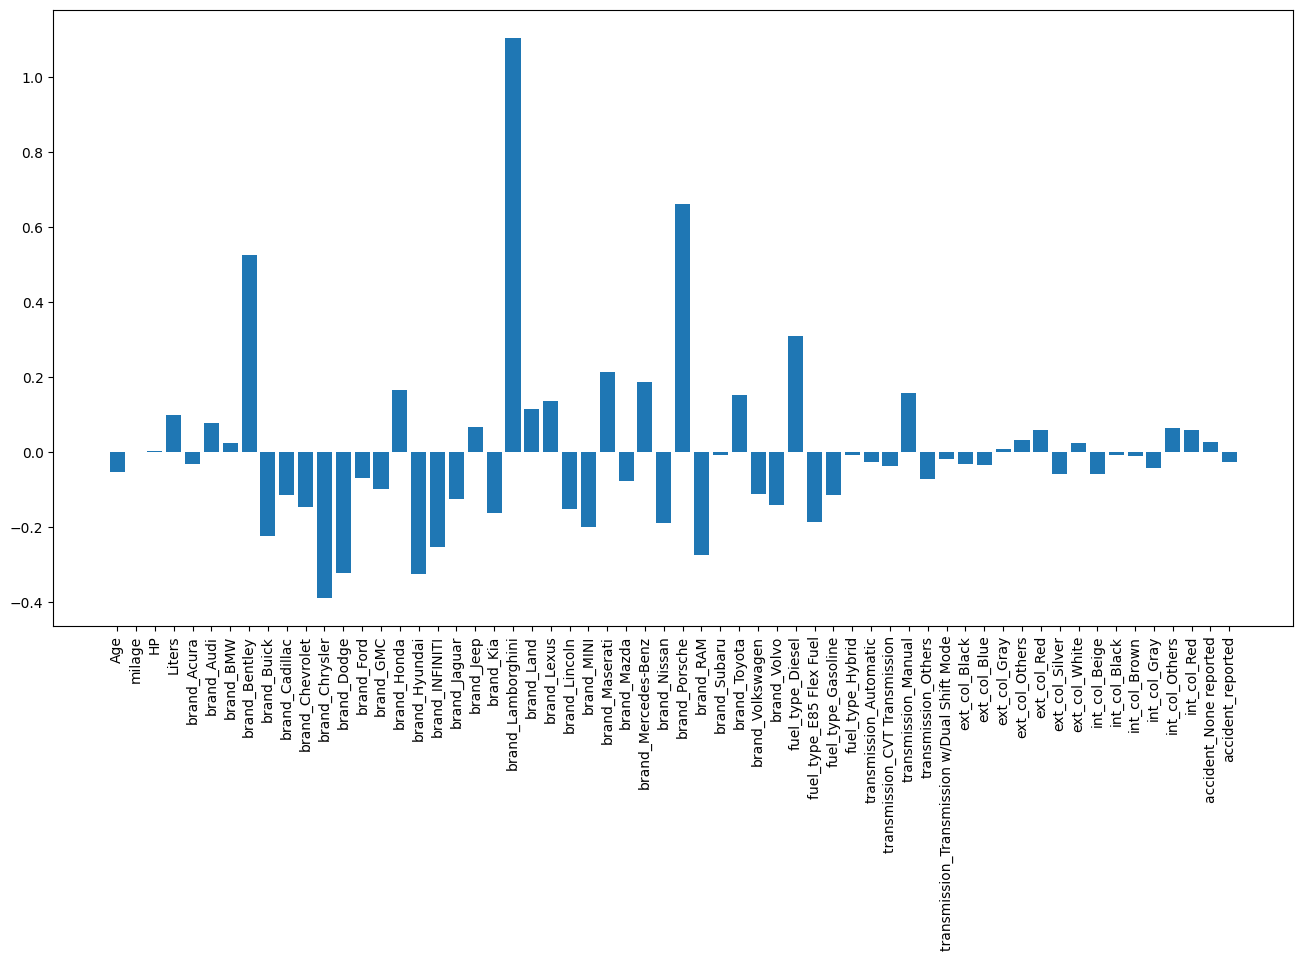

In [138]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,8))
plt.bar(height = feature_coef.loc[0] , x = feature_coef.columns)
plt.xticks(rotation = 90)
plt.show()

**Save the model for deployment**

In [139]:
import pickle

In [140]:
with open("carPprice.pkl","wb") as f:
    f.write(pickle.dumps(model2))

In [141]:
'''
with open("carScale.pkl","wb") as f:
    f.write(pickle.dumps(scl))
'''

'\nwith open("carScale.pkl","wb") as f:\n    f.write(pickle.dumps(scl))\n'

In [142]:
data_columns = {'columns' : list(xtrain.columns)}
data_columns

{'columns': ['Age',
  'milage',
  'HP',
  'Liters',
  'brand_Acura',
  'brand_Audi',
  'brand_BMW',
  'brand_Bentley',
  'brand_Buick',
  'brand_Cadillac',
  'brand_Chevrolet',
  'brand_Chrysler',
  'brand_Dodge',
  'brand_Ford',
  'brand_GMC',
  'brand_Honda',
  'brand_Hyundai',
  'brand_INFINITI',
  'brand_Jaguar',
  'brand_Jeep',
  'brand_Kia',
  'brand_Lamborghini',
  'brand_Land',
  'brand_Lexus',
  'brand_Lincoln',
  'brand_MINI',
  'brand_Maserati',
  'brand_Mazda',
  'brand_Mercedes-Benz',
  'brand_Nissan',
  'brand_Porsche',
  'brand_RAM',
  'brand_Subaru',
  'brand_Toyota',
  'brand_Volkswagen',
  'brand_Volvo',
  'fuel_type_Diesel',
  'fuel_type_E85 Flex Fuel',
  'fuel_type_Gasoline',
  'fuel_type_Hybrid',
  'transmission_Automatic',
  'transmission_CVT Transmission',
  'transmission_Manual',
  'transmission_Others',
  'transmission_Transmission w/Dual Shift Mode',
  'ext_col_Black',
  'ext_col_Blue',
  'ext_col_Gray',
  'ext_col_Others',
  'ext_col_Red',
  'ext_col_Silver',

In [143]:
import json

with open("data_columns.json","w") as f:
    f.write(json.dumps(data_columns))

**Predictions**

In [144]:
df9.head(2)

,brand,Age,milage,fuel_type,HP,Liters,transmission,ext_col,int_col,accident,price
0,Hyundai,2,34742,Gasoline,248.95,3.8,Automatic,Others,Gray,reported,38005.0
1,Audi,2,9835,Gasoline,318.67,2.0,Automatic,Others,Black,None reported,34999.0


In [145]:
df11.head(2)

,brand,Age,milage,fuel_type,HP,Liters,transmission,ext_col,int_col,accident,price
0,Hyundai,2,34742,Gasoline,248.95,3.8,Automatic,Others,Gray,reported,38005.0
1,Audi,2,9835,Gasoline,318.67,2.0,Automatic,Others,Black,None reported,34999.0


In [146]:
brand = 'Hyundai'
age = 2
milage = 9835
fueltype = 'Gasoline'
hp = 320
liters = 2
transmission = 'Automatic'
extcol = 'Black'
intcol= 'Black'
accident = 'None reported'

In [147]:
input = np.zeros(len(xtrain.columns))
input

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [148]:
xtrain.columns

Index(['Age', 'milage', 'HP', 'Liters', 'brand_Acura', 'brand_Audi',
       'brand_BMW', 'brand_Bentley', 'brand_Buick', 'brand_Cadillac',
       'brand_Chevrolet', 'brand_Chrysler', 'brand_Dodge', 'brand_Ford',
       'brand_GMC', 'brand_Honda', 'brand_Hyundai', 'brand_INFINITI',
       'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Lamborghini',
       'brand_Land', 'brand_Lexus', 'brand_Lincoln', 'brand_MINI',
       'brand_Maserati', 'brand_Mazda', 'brand_Mercedes-Benz', 'brand_Nissan',
       'brand_Porsche', 'brand_RAM', 'brand_Subaru', 'brand_Toyota',
       'brand_Volkswagen', 'brand_Volvo', 'fuel_type_Diesel',
       'fuel_type_E85 Flex Fuel', 'fuel_type_Gasoline', 'fuel_type_Hybrid',
       'transmission_Automatic', 'transmission_CVT Transmission',
       'transmission_Manual', 'transmission_Others',
       'transmission_Transmission w/Dual Shift Mode', 'ext_col_Black',
       'ext_col_Blue', 'ext_col_Gray', 'ext_col_Others', 'ext_col_Red',
       'ext_col_Silver', 'ext_co

In [149]:
input[0] = age
input[1] = milage
input[2] = hp
input[3] = liters


#reshape=>convert into two dimension => (1,-1) => -1 will use higher dimension i.e. 6
#input_scaled = scl.transform(input[0:6].reshape(1,-1))   
#input[0:6] = input_scaled 


print(input)

[2.000e+00 9.835e+03 3.200e+02 2.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00]


In [150]:
list(xtrain.columns).index('brand_'+brand)

16

In [151]:
input[list(xtrain.columns).index('brand_'+brand)] = 1
input[list(xtrain.columns).index('fuel_type_'+fueltype)] = 1
input[list(xtrain.columns).index('transmission_'+transmission)] = 1
input[list(xtrain.columns).index('ext_col_'+extcol)] = 1
input[list(xtrain.columns).index('int_col_'+intcol)] = 1
input[list(xtrain.columns).index('accident_'+accident)] = 1

print(input)

[2.000e+00 9.835e+03 3.200e+02 2.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e+00 0.000e+00]


In [152]:
input = pd.DataFrame(input.reshape(1,-1) , columns = xtrain.columns)
print(model2.predict(input))      #log value of price predicted

[10.29682783]


In [153]:
np.exp(model2.predict(input))

array([29638.45136108])

In [154]:
predicted_price = round(np.exp(model2.predict(input))[0])
print("Predicted Price-",predicted_price)  #take exp value of log value generated to get real predicted price

Predicted Price- 29638
